<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Задание 1 (на сопоставление)

'''Ваш ответ на задание №1 (в формате 1-А, 2-В и т.д.) '''

1-E, 2-B, 3-F, 4-C/G, 5-A

Задание 2 (про порошок)

'''Ваш ответ на задание №2 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:
H0 - средний вес порошка составляет 3 кг. (Дозатор работает исправно, в донастройке не нуждается)
H1 - средний вес порошка не равен 3 кг. (Дозатор работает неисправно, требуется донастройка)

У нас имеются данные о средней выборке, cтандартном отклонении (а следовательно дисперсии), размер выборки большой (50 шт.), поэтому  примени к этой задаче z-тест 

In [1]:
#импорт данных
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные
sample_mean = 3.005      # среднее значение выборки
general_mean = 3.0       # среднее значение генеральной совокупности
alpha = 0.05             # производитель порошка готов полагаться на 5% уровень значимости
general_std = 0.015      # стандартное отклонение генеральной совокупности
sample_size = 50         # размер выборки

#находим стандартную ошибку среднего
standard_error = general_std / math.sqrt(sample_size)

#вычисляем z-оценку вручную
z_score = (sample_mean - general_mean) / standard_error

#расчет p-значения для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

#вычисляем критическое z-значение для двустороннего теста
critical_z = stats.norm.ppf(1 - alpha / 2)

print(f"Z-оценка: {z_score}")
print(f"Критическое Z-значение: ±{critical_z}")

if abs(z_score) > critical_z:
    print("Отклонить нулевую гипотезу.")
else:
    print("Нельзя отклонить нулевую гипотезу.")

print(f"P-значение: {p_value}")
if p_value < alpha:
    print("Отклонить нулевую гипотезу.")
else:
    print("Нельзя отклонить нулевую гипотезу.")

Z-оценка: 2.3570226039551083
Критическое Z-значение: ±1.959963984540054
Отклонить нулевую гипотезу.
P-значение: 0.01842212545410149
Отклонить нулевую гипотезу.


**Статистический вывод**:<br>
Z-оценка показывает статистически значимое отклонение от среднего значения. Значение p-value подтверждает этот вывод.

**Содержательные вывод**:<br>
Порошок дозируется неправильно, требуется донастройка доазтора.

Задание 3 (про двигатели)

'''Ваш ответ на задание №3 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:
H0 - среднее значение прочности подвески с аллюминиевыми и стальными компонентами одинаковое. (Подвеска с аллюминиевыми компонентами такая же прочная, как со стальными)
H1 - среднее значение прочности подвески с аллюминиевыми и стальными компонентами разное. (Прочность подвески с аллюминиевыми компонентами отличается от подвески со стальными

Имеются данные о средней прочности и стандартном отклонении выборок из 10 и 15 элементов. Выборки при этом независимые. Применим тест Стьюдента для независимых выборок. 

In [3]:
#данные
n1, n2 = 15, 10        #размеры выборок
mean1, mean2 = 90, 88  #средние значения прочности
std1, std2 = 2.3, 2.2  #стандартные отклонения
alpha = 0.05           # уровень значимости

#рассчет t-статистики для независимых выборок
t_stat, p_value = stats.ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=n1,
                                             mean2=mean2, std2=std2, nobs2=n2,
                                             equal_var=False)

#степени свободы
df = n1 + n2 - 2

#критическое значение для двустороннего теста
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

print(f'Значение t-статистики: {t_stat}')
print(f'Критическое значение t-статистики: {t_critical}')

if abs(t_stat) > t_critical:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не отвергаем нулевую гипотезу.")


print(f'p-value: {p_value}')

if abs(t_stat) > t_critical:
    print("Отклонить нулевую гипотезу: есть статистически значимая разница между средними прочностями.")
else:
    print("Нельзя отклонить нулевую гипотезу: нет статистически значимой разницы между средними прочностями.")

Значение t-статистики: 2.186521551237011
Критическое значение t-статистики: 2.0686576104190406
Отвергаем нулевую гипотезу.
p-value: 0.04080198354528679
Отклонить нулевую гипотезу: есть статистически значимая разница между средними прочностями.


**Статистическийй вывод**:<br>
Существует статистически значимая разница в средней прочности подвесок с алюминиевыми и стальными компонентами. 

**Содержаительный вывод**:<br>
Подвески с алюминиевыми компонентами отличаются по прочности от подвесок со стальными компонентами. Заменить компоненты без изменения прочности, нельзя

Задание 4 (про токи)

'''Ваш ответ на задание №4 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:
H0 - Средние значения тока старой и новой схемы равны
H1 - Средние значения тока старой и новой схемы не равны

Выборки небольшие, по условию задачи выборки имеют равные дисперсии. Используем для этой задачи тест Стьюдента.

In [4]:
# Данные
scheme1 = [80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4]
scheme2 = [80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4, 85.2, 84.9]

# Уровень значимости
alpha = 0.05

# t-тест для независимых выборок с равными дисперсиями
t_stat, p_value = stats.ttest_ind(scheme1, scheme2, equal_var=True)

# Критическое значение t
df = len(scheme1) + len(scheme2) - 2  # Степени свободы
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Вывод результатов
print(f"\nРезультаты теста:")
print(f"t-статистика: {t_stat}")
print(f"p-value: {p_value}")
print(f"Критическое значение t: ±{t_critical}")

print("\nВывод:")
if p_value > alpha:
    print("Нет статистически значимых различий.")
else:
    print("Есть статистически значимые различия.")

if abs(t_stat) > t_critical:
    print("Отклоняем нулевую гипотезу: средние значения тока статистически значимо различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние значения тока статистически незначимо различаются.")



Результаты теста:
t-статистика: -1.8657246011714124
p-value: 0.07681685091779608
Критическое значение t: ±2.0859634472658364

Вывод:
Нет статистически значимых различий.
Не отвергаем нулевую гипотезу: средние значения тока статистически незначимо различаются.


**Статистический вывод**:<br>
Нет статистически значимых различий.

**Содержательный вывод**:<br>
Схема пропускает такой же средний ток, можно ее внедрять.

Задание 5 (про глюкозу)

'''Ваш ответ на задание №5 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:<br>
H0 - есть эффект от приема препарата.<br>
H1 - нет эффекта от приема препарата.<br>
Гипотезы надо проверить на уровне доверия 0.95

Здесь напрашивается парный t-тест, т.к. исследуем одну и ту же группу объектов.

In [5]:
#исходные данные
before = np.array([9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1])
after = np.array([7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0])

# Посчитаем t-статистику и p-value
t_statistic, p_value = stats.ttest_rel(before, after)

#считаем степени свободы
df = len(before) - 1

# Определим уровень альфа
alpha = 0.05

#ссчитаем критическое значение по альфа (95-й доверит. интервал)
critical_t = stats.t.ppf(1 - alpha/2, df)

#отображение результатов
print(f"T-статистика: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Крит. значение по альфа: ±{critical_t}")

#стат. выводы
if abs(t_statistic) > critical_t:
    print("Отклонить нулевую гипотезу.")
else:
    print("Нельзя отклонить нулевую гипотезу.")

if p_value < alpha:
    print("Значение p-value меньше уровня значимости. Есть статистически значимые различия.")
    print("Эффект от препарата есть. Уровень глюкозы у пациентов, принимавших новый препарат, меньше.")
else:
    print("Значение p-value больше уровня значимости. Нет статистически значимых различий.")
    print("Эффекта от препарата нет. Уровень глюкозы у пациентов, принимавших новый препарат, не изменился.")

T-статистика: 5.713032381721969
P-value: 0.0002894940396753496
Крит. значение по альфа: ±2.2621571627409915
Отклонить нулевую гипотезу.
Значение p-value меньше уровня значимости. Есть статистически значимые различия.
Эффект от препарата есть. Уровень глюкозы у пациентов, принимавших новый препарат, меньше.


Содержательный вывод:<br>
Эффект от препарата есть. Уровень глюкозы у пациентов, принимавших новый препарат, меньше.



Задание 6 (про тросы)

'''Ваш ответ на задание №6 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:<br>
H0 - средние прочности тросов равны<br>
H1 - средние прочности тросов отличается.<br>
Гипотезы надо проверить на уровне доверия 0.95<br><br>
Выборки небольшие, дисперсии неравные, выбираем   t-тест Уэлча (t-тест с неравными дисперсиями). Уровень стат. значимости 0.01

In [6]:
#Напряжение разрушения тросов
new_cable = np.array([92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9])
old_cable = np.array([90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5])

#расчет t-статистики и p-value по t-тесту Уэлча
t_statistic, p_value = stats.ttest_ind(new_cable, old_cable, equal_var=False)

#задаем уровень значимости
alpha = 0.01

#считаем степени свободы
df = len(new_cable) + len(old_cable) - 2

#Критическое значение t для одностороннего теста
critical_t = stats.t.ppf(1 - alpha, df)

print(f"T-статистика: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Крит. значение t для одностороннего теста: {critical_t}")

# Статистические выводы
print("Cтатистический вывод на основании значения t-стастистики:")
if t_statistic > critical_t:
    print("Отклонить нулевую гипотезу.")
else:
    print("Нельзя отклонить нулевую гипотезу.")

print("Cтатистический вывод на основании значения p-value:")
if p_value / 2 < alpha:  # Делим p-value на 2 для одностороннего теста
    print("Значение p-value меньше уровня значимости. Есть статистически значимые различия.")
else:
    print("Значение p-value больше уровня значимости. Нет статистически значимых различий.")

print("Содержательный вывод:")
# Содержательный вывод
if t_statistic > critical_t:
    print("Производитель должен заменить старый кабель новым, так как новый кабель демонстрирует более высокую прочность.")
else:
    print("Производитель не должен заменять старый кабель новым, так как нет статистически значимых различий в прочности.")

T-статистика: 3.120397708249153
P-value: 0.007590047168227897
Крит. значение t для одностороннего теста: 2.583487185267472
Cтатистический вывод на основании значения t-стастистики:
Отклонить нулевую гипотезу.
Cтатистический вывод на основании значения p-value:
Значение p-value меньше уровня значимости. Есть статистически значимые различия.
Содержательный вывод:
Производитель должен заменить старый кабель новым, так как новый кабель демонстрирует более высокую прочность.


Задание 7 (про абитуриентов)

'''Ваш ответ на задание №7 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:
H0 - Подготовительные курсы не влияют на подготовку абитуриентов.
H1 - Подготовительные курсы влияют на подготовку абитуриентов.

Проверяются изменения одних и тех же объектов (до и после изменения). Используем парный t-тест.
Гипотезы надо проверить на уровне узначимости 0.01

In [7]:
#Данные
before = np.array([7, 6, 5, 4, 6, 2, 10, 3, 8, 5])
after = np.array([9, 6, 4, 5, 7, 4, 10, 6, 9, 6])
alpha = 0.01

#проведем тест, получим т-статистику и p-value
t_stat, p_value = stats.ttest_rel(after, before)

#посчитаем степени свободы
df = len(before) - 1

#расчет крит. значения
t_crit = stats.t.ppf(1 - alpha/2, df)

print("Критические значения:")
print(f"t-критическое: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")
print()

print("Стат. вывод по критическому значению:")
if abs(t_stat) > t_crit:
    print(f"|{t_stat:.4f}| > {t_crit:.4f} - отвергаем H₀")
else:
    print(f"|{t_stat:.4f}| ≤ {t_crit:.4f} - не отвергаем H₀")
print()

print("Стат. вывод по p-value:")
if p_value < alpha:
    print(f"{p_value:.4f} < {alpha} - отвергаем H₀")
else:
    print(f"{p_value:.4f} ≥ {alpha} - не отвергаем H₀")
print()

print("Содержательный вывод:")
if p_value < alpha:
    print(f"Влияние курсов на результат тестирования доказано на уровне значимости {alpha}.")
else:
    print(f"Влияние курсов на результат тестирования не доказано на уровне значимости {alpha}.")

Критические значения:
t-критическое: ±3.2498
p-value: 0.0229

Стат. вывод по критическому значению:
|2.7386| ≤ 3.2498 - не отвергаем H₀

Стат. вывод по p-value:
0.0229 ≥ 0.01 - не отвергаем H₀

Содержательный вывод:
Влияние курсов на результат тестирования не доказано на уровне значимости 0.01.


Задание 8 (про фрукты и IQ)

'''Ваш ответ на задание №8 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:
H0 - Дисперсии двух групп одинаковые.
H1 - Дисперсии двух групп различаются.
Уровень стат. значимости: 0.05

Для проверки равенства дисперсий двух групп используется F-тест.

In [22]:
#данные
oranges = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
pears = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])
alpha = 0.05

#расчет дисперсии
var_oranges = np.var(oranges, ddof=1)
var_pears = np.var(pears, ddof=1)

#считам f-статистику (делим большую дисперсию на меньшую)
f_stat = max(var_oranges, var_pears) / min(var_oranges, var_pears)

#степени свободы
df1 = len(oranges) - 1
df2 = len(pears) - 1

#критическое значение (двусторонний тест)
f_crit = stats.f.ppf(1 - alpha, df1, df2)

#считаем P-value
p_value = 1 - stats.f.cdf(np.abs(f_stat), df1, df2)

print('f-stat:', f_stat)
print('f_crit', np.abs(f_crit))

#решение на основе сравнения критического значения f-stat с расчетным
if np.abs(f_stat) > f_crit:
    print("На основе f-crit отклоняем нулевую гипотезу: дисперсии групп различаются")
else: 
    print("На основе f-crit нельзя отклонить нулевую гипотезу: дисперсии групп не различаются")
print()
print('p-value :', p_value)
# принимаем решение на основе сравнения p-value и уровня значимости
if p_value < alpha:
    print(f"p-value: {p_value:.4f} < alpha: {alpha}")
    print("Отвергаем нулевую гипотезу. Дисперсии отличаются")
else:
    print(f"p-value: {p_value:.4f} >= alpha: {alpha}")
    print("Нельзя отклонить нулевую гипотезу. Существенных различий между выборками на уровне значимости 0.05 нет")

f-stat: 1.9061769156692807
f_crit 3.17889310445827
На основе f-crit нельзя отклонить нулевую гипотезу: дисперсии групп не различаются

p-value : 0.17529362058224196
p-value: 0.1753 >= alpha: 0.05
Нельзя отклонить нулевую гипотезу. Существенных различий между выборками на уровне значимости 0.05 нет


Задание 9 (про самолеты)

'''Ваш ответ на задание №9 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Поскольку рассчитываем количеством попыток до первого успеха, возьмем за основу геометрическое распределение. Проверим, подходит ли оно с помощью критерия хи-квадрат.

Анализ на соответствие геом. распределению:
Ожидаемая вероятность: 0.3650
Хи-квадрат: 3.0276
Крит. значение: 9.4877
P-value: 0.6957



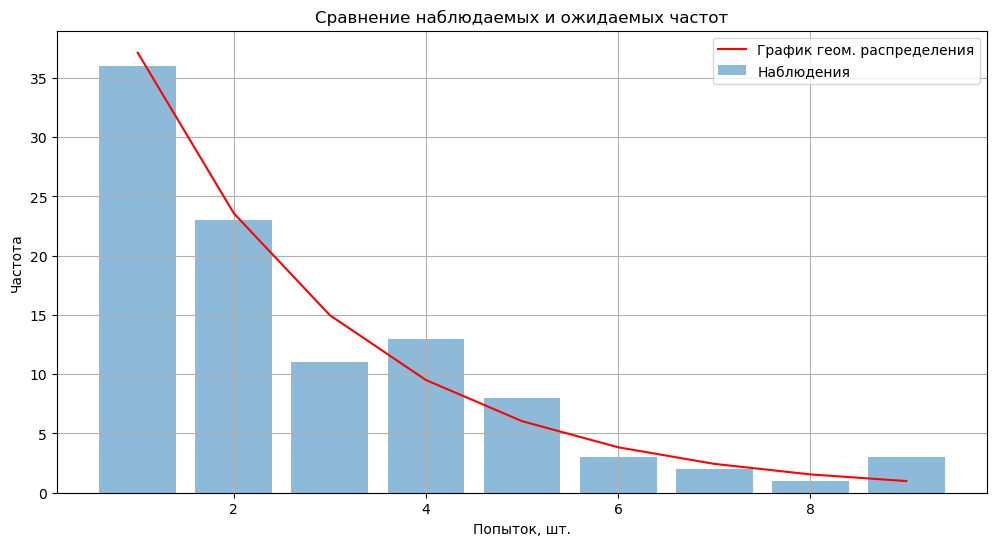

Вывод

Данные соответствую геометрическому распределению


In [9]:
#Данные
attempts = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
observed = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])
n = sum(observed)

#оцениваем вероятность успеха в каждом испытании
p = 1 / np.average(attempts, weights=observed)

#рассчитываем и нормируем ожидаемые вероятность в соответствии с геометрическим распределением
expected_prob = stats.geom.pmf(attempts, p)
expected = n * expected_prob / sum(expected_prob)

#для оценки хи-квадратсоздаем маску, которая выделяет категории с ожидаемыми частотами >= 5
mask = expected >= 5

# Выделяем наблюдаемые частоты для категорий с ожидаемыми частотами >= 5
observed_high_freq = observed[mask]

# Выделяем наблюдаемые частоты для категорий с ожидаемыми частотами < 5
observed_low_freq = observed[~mask]

# Суммируем наблюдаемые частоты для категорий с ожидаемыми частотами < 5
observed_low_freq_sum = observed_low_freq.sum()

# Объединяем наблюдаемые частоты: оставляем частоты для категорий с ожидаемыми частотами >= 5
# и добавляем сумму частот для категорий с ожидаемыми частотами < 5
observed_merged = np.append(observed_high_freq, observed_low_freq_sum)

# Выделяем ожидаемые частоты для категорий с ожидаемыми частотами >= 5
expected_high_freq = expected[mask]

# Выделяем ожидаемые частоты для категорий с ожидаемыми частотами < 5
expected_low_freq = expected[~mask]

# Суммируем ожидаемые частоты для категорий с ожидаемыми частотами < 5
expected_low_freq_sum = expected_low_freq.sum()

# Объединяем ожидаемые частоты: оставляем частоты для категорий с ожидаемыми частотами >= 5
# и добавляем сумму частот для категорий с ожидаемыми частотами < 5
expected_merged = np.append(expected_high_freq, expected_low_freq_sum)

#тест хи=квадрат и p-вэлью
chi2_stat, p_value = stats.chisquare(observed_merged, expected_merged)

#степени свободы
df = len(observed_merged) - 2

#Рассчитываем крит. значение
critical_value = stats.chi2.ppf(1 - 0.05, df)

#Выводим результаты
print(
    "Анализ на соответствие геом. распределению:\n"
    f"Ожидаемая вероятность: {p:.4f}\n"
    f"Хи-квадрат: {chi2_stat:.4f}\n"
    f"Крит. значение: {critical_value:.4f}\n"
    f"P-value: {p_value:.4f}\n"
)

#Рисуем
plt.figure(figsize=(12, 6))
plt.bar(attempts, observed, alpha=0.5, label='Наблюдения')
plt.plot(attempts, expected, 'r-', label='График геом. распределения')
plt.xlabel('Попыток, шт.')
plt.ylabel('Частота')
plt.title('Сравнение наблюдаемых и ожидаемых частот')
plt.legend()
plt.grid(True)
plt.show()

print("Вывод")
print()
print("Данные соответствую геометрическому распределению" if p_value > 0.05 else "данные не соответствуют геометрическому распределению")

Задание 10 (про цвет глаз и волос)

'''Ваш ответ на задание №10
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:<br>
H0 - Отсутствует зависимость между цветом глаз и волос отсутствует.<br>
H1 - Цвет глаз и волос зависят друг от друга.<br>
Уровень доверия: 0.95 

Данные категориальные (цвет глаз/волос), проверяем независимость их друг от друга, используем критерий хи-квадрат.

In [10]:
#данные
observations = np.array([
    [35, 52, 13],  # Голубые глаза
    [28, 42, 10],  # Карие глаза
    [7, 10, 3]     # Зеленые глаза
])

#вывод данных
print("Наблюдаемые частоты:")
print(observations)

#всего наблюдений
total = observations.sum()
print(f"Общая сумма: {total}")

#сумируем каждый цвет глаз
row_totals = observations.sum(axis=1)
print(f"Суммы строк: {row_totals}")

#сумируем каждый цвет волос
col_totals = observations.sum(axis=0)
print(f"Суммы столбцов: {col_totals}")

#Расчет ожидаемых частот для каждой категории
expected = np.outer(row_totals, col_totals) / total
print("Ожидаемые частоты:")
print(expected)

# Расчет статистики хи-квадрат
chi2_stat = ((observations - expected) ** 2 / expected).sum()
print(f"Статистика хи-квадрат: {chi2_stat:.4f}")

# Степени свободы
df = (observations.shape[0] - 1) * (observations.shape[1] - 1)
print(f"Степени свободы: {df}")

# Критическое значение для уровня доверия 0.95
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"Критическое значение: {critical_value:.4f}")

# P-value
p_value = 1 - stats.chi2.cdf(chi2_stat, df)
print(f"P-value: {p_value:.4f}")

# Принятие решения
print()    
print("Решение на основе крит. значения")
if chi2_stat > critical_value:
    print("Отвергаем нулевую гипотезу. Существует связь между цветом глаз и цветом волос.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств связи между цветом глаз и цветом волос.")
print()    
print("Решение на основе P-value")
if p_value < alpha:
    print("Существует статистически значимая связь между цветом глаз и волос")
else:
    print("Статистически значимой связи между цветом глаз и волос не обнаружено")

Наблюдаемые частоты:
[[35 52 13]
 [28 42 10]
 [ 7 10  3]]
Общая сумма: 200
Суммы строк: [100  80  20]
Суммы столбцов: [ 70 104  26]
Ожидаемые частоты:
[[35.  52.  13. ]
 [28.  41.6 10.4]
 [ 7.  10.4  2.6]]
Статистика хи-квадрат: 0.0962
Степени свободы: 4
Критическое значение: 9.4877
P-value: 0.9989

Решение на основе крит. значения
Не отвергаем нулевую гипотезу. Нет достаточных доказательств связи между цветом глаз и цветом волос.

Решение на основе P-value
Статистически значимой связи между цветом глаз и волос не обнаружено


Задание 11 (про тигров)

'''Ваш ответ на задание №11
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- в случае, если нулевая гипотеза отвергнута, сделан тест Тьюки для подробного сравнения средних
- сделано дополнение к статистическому выводу по результатам теста Тьюки
- сделан содержательный вывод по поставленной проблеме'''

Строим гипотезы:<br>
H0 - корм не влияет на среднюю массу тигров(статистически значимых различий между весом тигров в разных группах не существует)<br>
H1 - корм влияет на среднюю массу тигров (есть статистически значимые различия между весом тигров в разных группах)
уровень значимости = 0.05

К ксловиям задания подходит тест ANOVA, он позволяет сравнить значение двух или более выборок, определить, различаются ли средние значения между группами, или же различия случайны. Предполагаем нормальность распределения. 
Также нужно применить тест Тьюки для определения того, в каких парах групп наблюдается существенное отличие в средних.

In [11]:
# добавим модуль с кодом теста Тьюки
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#данные по типам питания
food_a = [151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132]
food_b = [108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108]
food_c = [140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139]
food_d = [127, 135, 110, 116, 119, 123, 102, 121, 118, 120, 114, 134, 121, 109]

#Проводим тестирование
f_stat, p_val = stats.f_oneway(food_a, food_b, food_c, food_d)

print("Результат теста ANOVA:")
print(f"F-статистика: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

#содединяем все веса вместе для теста Тьюки
all_weights = food_a + food_b + food_c + food_d

#создаем списки групп для теста
groups = ['A'] * 14 + ['B'] * 14 + ['C'] * 14 + ['D'] * 14

#Выполняем тест Тьюки
if p_val < 0.05:
    tukey_result = pairwise_tukeyhsd(all_weights, groups)
    print()
    print("Результат теста")
    print(tukey_result)
    print("Вывод: корм влияет на среднюю массу Тигров.")
else:
    print("Вывод: корм не влияет на среднюю массу Тигров.")

Результат теста ANOVA:
F-статистика: 21.9278
P-value: 0.0000

Результат теста
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B    -21.5    0.0  -32.019  -10.981   True
     A      C   5.8571  0.458  -4.6619  16.3762  False
     A      D -16.8571 0.0005 -27.3762  -6.3381   True
     B      C  27.3571    0.0  16.8381  37.8762   True
     B      D   4.6429 0.6473  -5.8762  15.1619  False
     C      D -22.7143    0.0 -33.2333 -12.1953   True
------------------------------------------------------
Вывод: корм влияет на среднюю массу Тигров.


**Содержательный вывод:**
Тип корма значительно влияет на среднюю массу тигров.
Значимые различия в средних массах наблюдаются между следующими парами типов корма: Тип 1 vs. Тип 2, Тип 1 vs. Тип 4, Тип 2 vs. Тип 3, Тип 3 vs. Тип 4.
Нет значимых различий в средних массах между: Тип 1 vs. Тип 3, Тип 2 vs. Тип 4.
Рекомендую кормить тигров кормом типа 3 .

Задание 12 (про белок)

'''Ваш ответ на задание №12
- верно указана применяемая статистика и обоснование ее применения
- расчет выполнен через последовательные суммы квадратов
- получены расчетные значения статистики
- получены значения p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

Надо определить, оказывают ли два фактора (возраст и статус размножения) значительное влияние на целевую переменную (масса тела африканских земляных белок). ANOVA подходит для задач, когда мы сравниваем средние значения между группами.
уровень доверия = 0.95

In [27]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Данные
data = {
    "1 год": {
        "Без выводка": [440, 438, 429, 502, 602],
        "С выводком": [308, 328, 326, 326, 325]
    },
    "2 года": {
        "Без выводка": [892, 868, 855, 866, 932],
        "С выводком": [737, 798, 876, 810, 861]
    },
    "3 и более лет": {
        "Без выводка": [1575, 849, 759, 1602, 1327],
        "С выводком": [1001, 901, 958, 1032, 883]
    }
}

#соберем данные в список словарей для теста
rows = []
for age, statuses in data.items():
    for status, values in statuses.items():
        for value in values:
            rows.append({"Возраст": age, "Статус": status, "Масса": value})

df = pd.DataFrame(rows)
print(df)

          Возраст       Статус  Масса
0           1 год  Без выводка    440
1           1 год  Без выводка    438
2           1 год  Без выводка    429
3           1 год  Без выводка    502
4           1 год  Без выводка    602
5           1 год   С выводком    308
6           1 год   С выводком    328
7           1 год   С выводком    326
8           1 год   С выводком    326
9           1 год   С выводком    325
10         2 года  Без выводка    892
11         2 года  Без выводка    868
12         2 года  Без выводка    855
13         2 года  Без выводка    866
14         2 года  Без выводка    932
15         2 года   С выводком    737
16         2 года   С выводком    798
17         2 года   С выводком    876
18         2 года   С выводком    810
19         2 года   С выводком    861
20  3 и более лет  Без выводка   1575
21  3 и более лет  Без выводка    849
22  3 и более лет  Без выводка    759
23  3 и более лет  Без выводка   1602
24  3 и более лет  Без выводка   1327
25  3 и боле

In [32]:
# Построим модель
model = ols('Масса ~ Возраст + Статус + Возраст:Статус', data=df).fit()

# Оценим влияние факторов, используя последовательные суммы квадратов (тип 1)
anova_results = anova_lm(model, typ=2)  # Используем тип 2 ANOVA
print(anova_results)

                   sum_sq    df          F        PR(>F)
Возраст         2427075.8   2.0  42.377707  1.333903e-08
Статус           202705.2   1.0   7.078626  1.368668e-02
Возраст:Статус    50688.2   2.0   0.885036  4.257428e-01
Residual         687269.6  24.0        NaN           NaN


**Выводы**:
<br>1. Эффект возраста:<br>
F-статистика: 42.377707, p-value: 1.333903e-08 (очень маленькое значение)
<br>p-значение (PR(>F) = 1.33e-08) значительно меньше 0.05, что говорит о том, что эффект возраста статистически значим. Это означает, что различия между группами по возрасту не случайны и имеют практическое значение.

<br>**2. Эффект выводка (статуса):**<br>
F-статистика: 7.078626, p-value: 1.368668e-02 (0.01368668 )
Наблюдается статистически значимое влияние фактора "выводок" на массу. Другими словами, масса существенно различается между группами "Без выводка" и "С выводком".
<br><br>
3.**Эффект взаимодействия: возраст: выводок**<br>
F-статистика: 0.885036, p-value: 0.4257428 (больше 0.05)
Вывод: взаимодействие двух факторов не является статистически значимым, эффекты этих факторов следует рассматривать независимо друг от друга.


